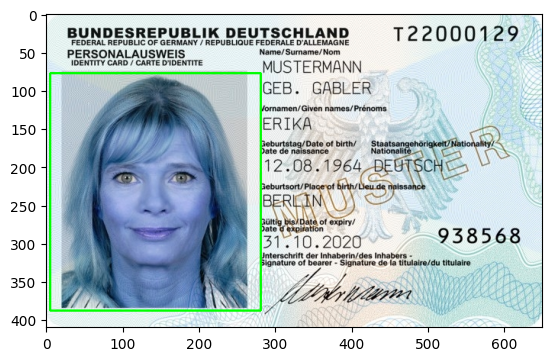

In [199]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def detect_face(image):
    gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    face_cascade_model_file = r'C:\Users\Rodrigue\Desktop\formation\python\Data-analysis\venv\Lib\site-packages\cv2\data\haarcascade_frontalface_alt2.xml'

    face_cascade = cv.CascadeClassifier(face_cascade_model_file)
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv.CASCADE_SCALE_IMAGE
    )
    x_eps = 0.3
    y_eps = 0.4
    if len(faces) == 1:
        x,y,w,h = faces[0]
        x -= int(x_eps*w)
        y -= int(y_eps*h)
        w = int(w*(1+2*x_eps))
        h = int(h*(1+2*y_eps))
        return (x,y,w,h)
        

def draw_dectected_face(image):
    x, y, w, h = detect_face(image)
    # image[y:y+h, x:x+w] = 0
    cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    plt.imshow(image)
image = cv.imread('card3.jpg')
draw_dectected_face(image)

3090

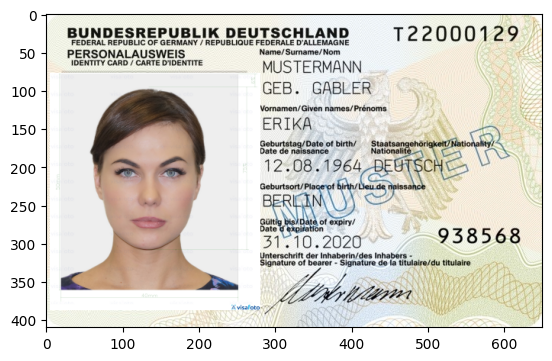

In [215]:
source = cv.imread('card3.jpg')
target = cv.imread('target1.jpg')
def replace_face(source,target):
    x,y,w,h = detect_face(source)
    resized_target = cv.resize(target,(w,h),interpolation = cv.INTER_AREA)
    source[y:y+h,x:x+w] = resized_target[0:h,0:w]
    return source

replaced = replace_face(source,target)
plt.imshow(cv.cvtColor(source,cv.COLOR_BGR2RGB))
target.shape[1]